## Задание № 7

### Урок 7. Классификация с помощью KNN. Кластеризация K-means

#### Задание

1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.
2. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. **Сделать выводы**.
3. Настроить оптимальное значение числа соседей для моделей из п.1 и п.2. **Cделать выводы**.
4. **(опция)** Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

> Построим ООП модель алгоритма


In [1]:
from abc import ABC

import numpy as np
from sklearn import model_selection

> определим абстракный класс метрики расстояния

In [2]:
class FuncDist(ABC):
    def calc(self, x1, x2):
        pass


> определим класс модели kNN

In [3]:
class GbKnn:
    eta = 0
    qu = 0
    k_neighbours = 0

    X_train = None
    X_test = None
    y_train = None
    y_test = None

    func_dist = None

    def __init__(self, X, y, func_dist: FuncDist, k_neighbours=1, test_size=0.25, eta=1, qu=0.5):
        self.params(k_neighbours=k_neighbours, eta=eta, qu=qu)
        # разделение выборки встроено в класс
        self.X_train, self.X_test, self.y_train, self.y_test = model_selection.train_test_split(X, y,
                                                                                                test_size=test_size,
                                                                                                random_state=1)
        self.func_dist = func_dist

    def params(self, k_neighbours=1, eta=1, qu=0.5):
        self.k_neighbours = k_neighbours
        self.eta = eta
        self.qu = qu

    def predict(self):
        answers = []
        for x in self.X_test:
            test_distances = []

            for i in range(len(self.X_train)):
                # расчет расстояния от классифицируемого объекта до
                # объекта обучающей выборки
                distance = self.func_dist.calc(x, self.X_train[i])

                # Записываем в список значение расстояния и ответа на объекте обучающей выборки
                test_distances.append((distance, self.y_train[i]))

            # создаем словарь со всеми возможными классами
            classes = {class_item: 0 for class_item in set(self.y_train)}

            test_distances = self.ordered(test_distances)
            # print(test_distances)

            # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
            for d in test_distances[0:self.k_neighbours]:
                classes[d[1]] += 1

            # Записываем в список ответов наиболее часто встречающийся класс
            answers.append(sorted(classes, key=classes.get)[-1])
        return answers

    def accuracy(self, pred, y):
        return (sum(pred == y) / len(y))

    def quality(self, pred):
        return self.accuracy(pred, self.y_test)

    # шаблонный метод расчета расстояния
    def ordered(self, distance):
        return sorted(distance)

> Определим конкретный класс расчета Евклидовой метрики расстояния

In [4]:
class EvMetDist(FuncDist):
    def calc(self, x1, x2):
        distance = 0
        for i in range(len(x1)):
            distance += np.square(x1[i] - x2[i])

        return np.sqrt(distance)


> переопределим шаблонный метод расчета расстояний с учетом весов, которые зависят от номера по удаленности

In [5]:
class GbKnnWNum(GbKnn):

    def ordered(self, distance):
        w_distance = []
        for i, (d, y) in enumerate(sorted(distance)):
            w_distance.append((d * (1 / (i + 1)), y))
        return sorted(w_distance, reverse=True)


> переопределим шаблонный метод расчета расстояний с учетом весов, которые зависят от расстояния


In [6]:
class GbKnnWDist(GbKnn):

    def ordered(self, distance):
        w_distance = []
        for i, (d, y) in enumerate(distance):
            w_distance.append((self.qu ** d, y))
        return sorted(w_distance, reverse=True)


Загрузим один из "игрушечных" датасетов из sklearn.

In [23]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

In [24]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

### Задание 1.


In [11]:
gbknn1 = GbKnn(X, y, EvMetDist(), test_size=0.2, k_neighbours=4)
gbknn1.quality(gbknn1.predict())

0.8333333333333334

In [12]:
gbknn2 = GbKnnWNum(X, y, EvMetDist(), test_size=0.2, k_neighbours=4)
gbknn2.quality(gbknn2.predict())

0.7333333333333333

In [29]:
ex1_pred1 = []
ex1_pred2 = []
for k in range(1,10+1):
    gbknn1.params(k_neighbours=k)
    gbknn2.params(k_neighbours=k)
    ex1_pred1.append([k,gbknn1.quality(gbknn1.predict())])
    ex1_pred2.append([k,gbknn2.quality(gbknn2.predict())])
ex1_pred1 = np.array(ex1_pred1)
ex1_pred2 = np.array(ex1_pred2)

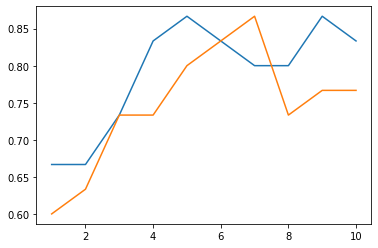

In [41]:
from matplotlib import pyplot as plt

plt.plot(ex1_pred1[:,:1], ex1_pred1[:,1:2])
plt.plot(ex1_pred2[:,:1], ex1_pred2[:,1:2])
plt.show()



### Задание 2.


In [13]:
gbknn3 = GbKnnWDist(X, y, EvMetDist(), test_size=0.2, k_neighbours=4)
gbknn3.quality(gbknn3.predict())



0.7666666666666667

### Задание 3.


In [14]:
gbknn1 = GbKnn(X, y, EvMetDist(), test_size=0.2)
gbknn2 = GbKnnWNum(X, y, EvMetDist(), test_size=0.2)
gbknn3 = GbKnnWDist(X, y, EvMetDist(), test_size=0.2, qu=0.3)
preds1 = []
preds_wnum = []
preds_wdist = []

for k in range(1, 10 + 1):
    gbknn1.params(k_neighbours=k)
    gbknn2.params(k_neighbours=k)
    gbknn3.params(k_neighbours=k)
    preds1.append(gbknn1.quality(gbknn1.predict()))
    preds_wnum.append(gbknn2.quality(gbknn2.predict()))
    preds_wdist.append(gbknn3.quality(gbknn3.predict()))

print(preds1)
print(preds_wnum)
print(preds_wdist)

[0.6666666666666666, 0.6666666666666666, 0.7333333333333333, 0.8333333333333334, 0.8666666666666667, 0.8333333333333334, 0.8, 0.8, 0.8666666666666667]
[0.6, 0.6333333333333333, 0.7333333333333333, 0.7333333333333333, 0.8, 0.8333333333333334, 0.8666666666666667, 0.7333333333333333, 0.7666666666666667]
[0.7333333333333333, 0.7, 0.7, 0.7666666666666667, 0.8, 0.7333333333333333, 0.8, 0.7666666666666667, 0.8666666666666667]
